<a href="https://colab.research.google.com/github/AhmedMohamedAbdelalim/Web-Application-Attacks/blob/main/Web_Attacks_with_CSIC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Install
!pip install -U gdown
import gdown


In [2]:

file_id = '1YVxjEXKbL8Eyq7BVhHCJmgokMaVMTjJ-'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'csic_database.csv'

gdown.download(url, output, quiet=False)

import pandas as pd
dataset_data = pd.read_csv('csic_database.csv')
dataset_data.head()


Downloading...
From: https://drive.google.com/uc?id=1YVxjEXKbL8Eyq7BVhHCJmgokMaVMTjJ-
To: /content/csic_database.csv
100%|██████████| 29.5M/29.5M [00:00<00:00, 60.2MB/s]


,Unnamed: 0,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, log_loss
#For Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# For Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
#For Decision Tree
from sklearn.tree import DecisionTreeClassifier
#For KNN
from sklearn.neighbors import KNeighborsClassifier
#For SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
#For XGBoot
from xgboost import XGBClassifier

import time
import pickle


# 1. DATASET UNDERSTANDING

In [4]:
print("\n CSIC General Information:")
print(dataset_data.info())

# Read number of samples and number of features
n_features=dataset_data.shape[1]
n_samples =dataset_data.shape[0]
print("\n")
print("Sample number:", n_samples)
print("Feature number:", n_features)

# Check column names (Column Title)
print("\n")
print("Columns:",dataset_data.columns)


 CSIC General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61065 entries, 0 to 61064
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       61065 non-null  object
 1   Method           61065 non-null  object
 2   User-Agent       61065 non-null  object
 3   Pragma           61065 non-null  object
 4   Cache-Control    61065 non-null  object
 5   Accept           60668 non-null  object
 6   Accept-encoding  61065 non-null  object
 7   Accept-charset   61065 non-null  object
 8   language         61065 non-null  object
 9   host             61065 non-null  object
 10  cookie           61065 non-null  object
 11  content-type     17977 non-null  object
 12  connection       61065 non-null  object
 13  lenght           17977 non-null  object
 14  content          17977 non-null  object
 15  classification   61065 non-null  int64 
 16  URL              61065 non-null  object
dtypes: 

In [5]:
# The first and last 5 samples of the Dataset
print("The first 5 samples of the Dataset: \n",dataset_data.head())
print("\n")
print("The last 5 samples of the Dataset: \n",dataset_data.tail())


The first 5 samples of the Dataset: 
   Unnamed: 0 Method                                         User-Agent  \
0     Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
1     Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
2     Normal   POST  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
3     Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
4     Normal   POST  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   

     Pragma Cache-Control                                             Accept  \
0  no-cache      no-cache  text/xml,application/xml,application/xhtml+xml...   
1  no-cache      no-cache  text/xml,application/xml,application/xhtml+xml...   
2  no-cache      no-cache  text/xml,application/xml,application/xhtml+xml...   
3  no-cache      no-cache  text/xml,application/xml,application/xhtml+xml...   
4  no-cache      no-cache  text/xml,application/xml,application/xhtml+xml...   

                    Accept-encoding 

## 1.2. Dataset Visuallization
Check the balance of the data by the first column ('Unnamed: 0')



Sample number by Normal and Anomalous: 
   Unnamed: 0  count
0     Normal  36000
1  Anomalous  25065


Label distribution of CSIC:
classification
0    0.589536
1    0.410464
Name: proportion, dtype: float64


Data visuallization:


<Axes: xlabel='Unnamed: 0', ylabel='count'>

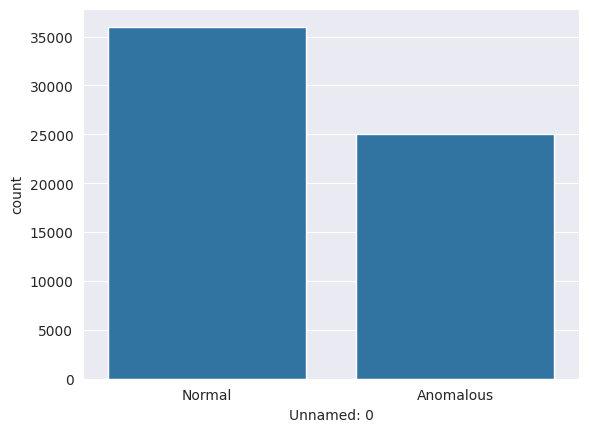

In [6]:
# Count the number of records by: Normal and Anomalous
print("\n")
print("Sample number by Normal and Anomalous: \n",dataset_data['Unnamed: 0'].value_counts().reset_index(name='count').rename(columns={'index': 'type'}))
# Label distribution ratio
print("\n")
print("Label distribution of CSIC:")
print(dataset_data['classification'].value_counts(normalize=True))
# Data visuallization
print("\n")
print("Data visuallization:")
sns.set_style('darkgrid')
sns.countplot(data=dataset_data, x='Unnamed: 0')

## 1.3. Rename column 'Unnamed:0' to label and check for Null values

In [7]:
# Rename 'Unnamed:0' to 'label'
dataset_data = dataset_data.rename(columns={'Unnamed: 0': 'label'})
print(dataset_data.isnull().sum())

label                  0
Method                 0
User-Agent             0
Pragma                 0
Cache-Control          0
Accept               397
Accept-encoding        0
Accept-charset         0
language               0
host                   0
cookie                 0
content-type       43088
connection             0
lenght             43088
content            43088
classification         0
URL                    0
dtype: int64


# 2. DATA PRE-PROCESSING
## 2.1. Clean Data
**Objective**: Remove or process invalid patterns/columns, missing values, or redundancies to ensure clean data.

In [8]:
# ------ Process NaN Data----------
# Accept column, replace NaN with the most common value (mode) of the column
dataset_data['Accept'] = dataset_data['Accept'].fillna(dataset_data['Accept'].mode()[0])
print(dataset_data['Accept'].isnull().sum())

0


In [9]:
# Handle columns: content-type, lenght, content
# Replace NaN with "None" for content-type and content, 0 for lenght to keep context information.
# Create new column is_post (1 if POST, 0 if GET) to record the request type.
dataset_data['content-type'] = dataset_data['content-type'].fillna('None')
dataset_data['lenght'] = dataset_data['lenght'].fillna('0')
dataset_data['content'] = dataset_data['content'].fillna('None')
dataset_data['is_post'] = dataset_data['Method'].apply(lambda x: 1 if x == 'POST' else 0)

# Re-Check
print(dataset_data.isnull().sum())

label              0
Method             0
User-Agent         0
Pragma             0
Cache-Control      0
Accept             0
Accept-encoding    0
Accept-charset     0
language           0
host               0
cookie             0
content-type       0
connection         0
lenght             0
content            0
classification     0
URL                0
is_post            0
dtype: int64


In [10]:
#----------- Remove unnecessary columns ------------
# Unnamed column: 0 (changed to label) as just descriptive label (Normal/Anomalous),
# duplicates with classification column. Can be removed to reduce noise.
dataset_data = dataset_data.drop(columns=['label'], errors='ignore')
# Re-check
print("\n")
print("Column's names:",dataset_data.columns)



Column's names: Index(['Method', 'User-Agent', 'Pragma', 'Cache-Control', 'Accept',
       'Accept-encoding', 'Accept-charset', 'language', 'host', 'cookie',
       'content-type', 'connection', 'lenght', 'content', 'classification',
       'URL', 'is_post'],
      dtype='object')


In [11]:
# Check and remove duplicate values (if any)
print("Duplicate sample number:", dataset_data.duplicated().sum())

Duplicate sample number: 0


In [12]:
dataset_data['URL'] = dataset_data['URL'].str.replace('http://localhost:8080', '', regex=False)

## 2.2. Feature extraction and encoding
**Goal**: Convert text data (URL, payload, headers) into numeric form that can be processed by machine learning models.

In [13]:
#------------- Feature extraction -----------
# Define malicious keywords
malicious_keywords = [
    'SELECT', 'UNION', 'DROP', 'DELETE', 'FROM', 'WHERE', 'OR', 'LIKE', 'AND', '1=1', '--', '\'',
    'SCRIPT', 'javascript', 'alert', 'iframe', 'src=', 'onerror', 'prompt', 'confirm', 'eval', 'onload',
    'mouseover', 'onunload', 'document.', 'window.', 'xmlhttprequest', 'xhr', 'cookie',
    'tamper', 'vaciar', 'carrito', 'incorrect', 'pwd', 'login', 'password', 'id',
    '%0D', '%0A', '.php', '.js', 'admin', 'administrator'
]

# Feature extraction from URL
dataset_data['url_length'] = dataset_data['URL'].apply(len)
dataset_data['url_special_chars'] = dataset_data['URL'].apply(lambda x: len(re.findall(r'[%;=<>\/&\'"()\[\]#\-\+]', x)))
dataset_data['url_malicious_keywords'] = dataset_data['URL'].apply(lambda x: sum(1 for kw in malicious_keywords if kw.lower() in x.lower()))
dataset_data['url_params_count'] = dataset_data['URL'].apply(lambda x: x.count('&') + 1 if '?' in x else 0)

# Feature extraction from content
dataset_data['content_length'] = dataset_data['content'].fillna('').apply(len)
dataset_data['content_special_chars'] = dataset_data['content'].fillna('').apply(lambda x: len(re.findall(r'[%;=<>\/&\'"()\[\]#\-\+]', x)))
dataset_data['content_malicious_keywords'] = dataset_data['content'].fillna('').apply(lambda x: sum(1 for kw in malicious_keywords if kw.lower() in x.lower()))

# Check Feature Distribution
print("PFeature Distribution by Class:")
print(dataset_data.groupby('classification')[['url_length', 'url_special_chars', 'url_malicious_keywords', 'url_params_count',
                                            'content_length', 'content_special_chars', 'content_malicious_keywords']].mean())

# Save Feature contribution
dataset_data.to_csv('dataset_with_features.csv', index=False)
print("Feature Distribution was saved!")

PFeature Distribution by Class:
                url_length  url_special_chars  url_malicious_keywords  \
classification                                                          
0                57.985944           6.930694                1.290833   
1                85.611769          11.273050                2.087133   

                url_params_count  content_length  content_special_chars  \
classification                                                            
0                       1.166667       23.458167               2.875139   
1                       2.233034       50.990824               7.418033   

                content_malicious_keywords  
classification                              
0                                 0.513056  
1                                 1.123399  
Feature Distribution was saved!


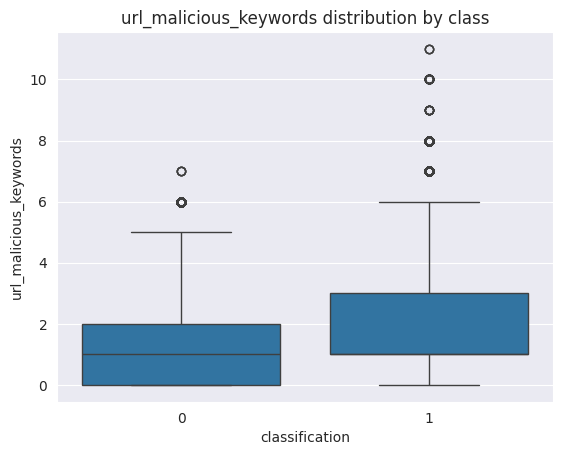

In [14]:
# Feature Distribution visuallization
sns.boxplot(x='classification', y='url_malicious_keywords', data=dataset_data)
plt.title('url_malicious_keywords distribution by class')
plt.show()

In [15]:
print("Column's names:",dataset_data.columns)

Column's names: Index(['Method', 'User-Agent', 'Pragma', 'Cache-Control', 'Accept',
       'Accept-encoding', 'Accept-charset', 'language', 'host', 'cookie',
       'content-type', 'connection', 'lenght', 'content', 'classification',
       'URL', 'is_post', 'url_length', 'url_special_chars',
       'url_malicious_keywords', 'url_params_count', 'content_length',
       'content_special_chars', 'content_malicious_keywords'],
      dtype='object')


In [16]:
# Encode URLs and content using TF-IDF

# Missing values in content
dataset_data['content'] = dataset_data['content'].fillna('')

# Generate TF-IDF for URL
url_tfidf = TfidfVectorizer(max_features=1000, lowercase=True, token_pattern=r'(?u)\b\w+\b')
url_features = url_tfidf.fit_transform(dataset_data['URL']).toarray()
url_feature_names = url_tfidf.get_feature_names_out()
print("TF-IDF URL matrix size:", url_features.shape)
print("Some words in the URL vocabulary:", url_feature_names[:10])



TF-IDF URL matrix size: (61065, 1000)
Some words in the URL vocabulary: ['0' '09390' '1' '10' '100' '102' '103' '104' '105' '106']


In [17]:
### Convert NumPy array to DataFrame using the TF-IDF feature names as column headers
##url_features_dfcsv = pd.DataFrame(url_features, columns=url_feature_names)

### Save to CSV
##url_features_dfcsv.to_csv('url_features_dfcsv.csv', index=False)

In [18]:
pd.DataFrame(url_features, columns=url_feature_names).head()

,0,09390,1,10,100,102,103,104,105,106,...,xmlfile,y,ye,yu,zamora,zaragoza,zarauz,zm,zr,zw
0,0.0,0.0,0.390760,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.110316,0.0,0.293999,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.421966,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.150600,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.421169,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
print(dataset_data['URL'])


0                              /tienda1/index.jsp HTTP/1.1
1        /tienda1/publico/anadir.jsp?id=3&nombre=Vino+R...
2                     /tienda1/publico/anadir.jsp HTTP/1.1
3        /tienda1/publico/autenticar.jsp?modo=entrar&lo...
4                 /tienda1/publico/autenticar.jsp HTTP/1.1
                               ...                        
61060    /tienda1/miembros/editar.jsp?modo=registro&log...
61061                /tienda1/miembros/editar.jsp HTTP/1.1
61062            /tienda1/miembros/editar.jsp.bak HTTP/1.1
61063                    /tienda1/imagenes/3.gif/ HTTP/1.1
61064     /tienda1/imagenes/nuestratierra.jpg.BAK HTTP/1.1
Name: URL, Length: 61065, dtype: object


In [20]:
# Generate TF-IDF for content
content_tfidf = TfidfVectorizer(max_features=1000, lowercase=True, token_pattern=r'(?u)\b\w+\b')
content_features = content_tfidf.fit_transform(dataset_data['content']).toarray()
content_feature_names = content_tfidf.get_feature_names_out()
print("TF-IDF content matrix size:", content_features.shape)
print("Some words in content vocabulary:", content_feature_names[:10])


TF-IDF content matrix size: (61065, 1000)
Some words in content vocabulary: ['0' '09390' '1' '10' '100' '102' '103' '104' '105' '106']


In [21]:
import joblib

# حفظ الـ TfidfVectorizer للـ URL
joblib.dump(url_tfidf, 'url_vectorizer.pkl')

# حفظ الـ TfidfVectorizer للـ Content
joblib.dump(content_tfidf, 'content_vectorizer.pkl')

print("تم حفظ TF-IDF Vectorizers.")


تم حفظ TF-IDF Vectorizers.


In [22]:
print("columns:", dataset_data.columns)

columns: Index(['Method', 'User-Agent', 'Pragma', 'Cache-Control', 'Accept',
       'Accept-encoding', 'Accept-charset', 'language', 'host', 'cookie',
       'content-type', 'connection', 'lenght', 'content', 'classification',
       'URL', 'is_post', 'url_length', 'url_special_chars',
       'url_malicious_keywords', 'url_params_count', 'content_length',
       'content_special_chars', 'content_malicious_keywords'],
      dtype='object')


In [23]:
# Encode category columns using One-Hot Encoding
# Encoding Method and content-type
dataset_data = pd.get_dummies(dataset_data, columns=['Method', 'content-type'], prefix=['Method', 'content-type'], drop_first=True)
print("After encryption:", dataset_data.columns)


After encryption: Index(['User-Agent', 'Pragma', 'Cache-Control', 'Accept', 'Accept-encoding',
       'Accept-charset', 'language', 'host', 'cookie', 'connection', 'lenght',
       'content', 'classification', 'URL', 'is_post', 'url_length',
       'url_special_chars', 'url_malicious_keywords', 'url_params_count',
       'content_length', 'content_special_chars', 'content_malicious_keywords',
       'Method_POST', 'Method_PUT',
       'content-type_application/x-www-form-urlencoded'],
      dtype='object')


In [24]:
pd.DataFrame(content_features, columns=content_feature_names).head()

,0,09390,1,10,100,102,103,104,105,106,...,y,yago,ye,yu,zabala,zamora,zaragoza,zm,zr,zw
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.300976,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Feature Combination
# Manually Features selection
manual_features = dataset_data[['url_length', 'url_special_chars', 'url_malicious_keywords', 'url_params_count',
                               'content_length', 'content_special_chars', 'content_malicious_keywords',
                               'is_post']]

one_hot_features = dataset_data.filter(like='Method_|content-type_')

feature_matrix = np.hstack([manual_features.values, one_hot_features.values, url_features, content_features])
print("Total feature matrix size:", feature_matrix.shape)

# Save feature matrix and labels
np.save('feature_matrix.npy', feature_matrix)
np.save('labels.npy', dataset_data['classification'].values)
##labels_df = pd.DataFrame(dataset_data['classification'].values, columns=['label'])
# Save to CSV
##labels_df.to_csv('labels.csv', index=False)
# Re-check
print("Is there any NaN in the matrix?", np.isnan(feature_matrix).sum())
print("The first 10 of feature samples:", feature_matrix[0, :10])

Total feature matrix size: (61065, 2008)
Is there any NaN in the matrix? 0
The first 10 of feature samples: [27.  3.  1.  0.  4.  0.  0.  0.  0.  0.]


In [26]:
print("One-hot feature shape:", one_hot_features.shape)
print("One-hot feature shape:", one_hot_features)

One-hot feature shape: (61065, 0)
One-hot feature shape: Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[61065 rows x 0 columns]


In [27]:
# Show the first 3 rows of the full feature matrix
print("First 3 rows of the feature matrix:\n", feature_matrix[:3])


First 3 rows of the feature matrix:
 [[ 27.   3.   1. ...   0.   0.   0.]
 [105.  17.   3. ...   0.   0.   0.]
 [ 36.   4.   1. ...   0.   0.   0.]]


In [28]:
# Convert to DataFrame to see it clearly
feature_df = pd.DataFrame(feature_matrix)

# Show first 3 rows
print(feature_df.head(3))

    0     1     2     3     4     5     6     7     8     9     ...  1998  \
0   27.0   3.0   1.0   0.0   4.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1  105.0  17.0   3.0   5.0   4.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   36.0   4.0   1.0   0.0  68.0  13.0   2.0   1.0   0.0   0.0  ...   0.0   

   1999  2000  2001  2002  2003  2004  2005  2006  2007  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[3 rows x 2008 columns]


In [29]:


### Save the DataFrame to a CSV file
##feature_df.to_csv('feature_matrix.csv', index=False)

##print("Feature matrix has been saved as 'feature_matrix.csv'")




## 2.3. Data normalization

In [30]:
#-------- Data normalization ------------
# Check before normalizing
print("Number of NaN values ​​in the matrix:", np.isnan(feature_matrix).sum())
if np.isnan(feature_matrix).sum() > 0:
    # Replace NaN with 0 (or mean if needed)
    feature_matrix = np.nan_to_num(feature_matrix, nan=0.0)

Number of NaN values ​​in the matrix: 0


In [31]:
# Data normalization
scaler = StandardScaler()
feature_matrix_scaled = scaler.fit_transform(feature_matrix)
print("Matrix size after normalization:", feature_matrix_scaled.shape)
print("Sample value after normalization:", feature_matrix_scaled[0, :10])

Matrix size after normalization: (61065, 2008)
Sample value after normalization: [-0.56025611 -0.50971368 -0.3964348  -0.4469256  -0.41297921 -0.42000477
 -0.54358599 -0.63582807 -0.03534143 -0.01452829]


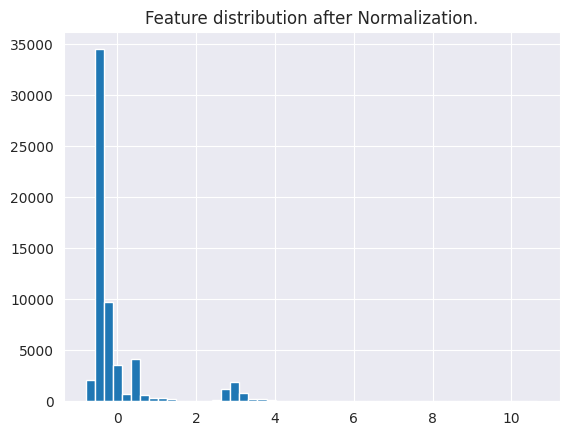

In [32]:
# Save after Normalization
np.save('feature_matrix_scaled.npy', feature_matrix_scaled)
np.save('labels.npy', dataset_data['classification'].values)

joblib.dump(scaler, 'scaler.pkl')

# Re-check & Visualization
plt.hist(feature_matrix_scaled[:, 0], bins=50)
plt.title('Feature distribution after Normalization.')
plt.show()

## 2.4. Data Balancing
* **Problem**: Currently valid:toxic sample ratio (~36,000:25,000, ratio ~59:41).
* **Resolution**: Need to perform data balance

In [33]:
# Check befor Balancing by SMOTE
print("Label distribution before SMOTE:")
print(pd.Series(dataset_data['classification']).value_counts())

Label distribution before SMOTE:
classification
0    36000
1    25065
Name: count, dtype: int64


In [34]:
# Data balancing by SMOTE
smote = SMOTE(random_state=42, sampling_strategy='auto')  # sampling_strategy='auto' để cân bằng 50:50
X_resampled, y_resampled = smote.fit_resample(feature_matrix_scaled, dataset_data['classification'])

# Check after SMOTE
print("\nLabel distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Label distribution after SMOTE:
classification
0    36000
1    36000
Name: count, dtype: int64


In [35]:
# Save balanced Data
np.save('X_resampled.npy', X_resampled)
np.save('y_resampled.npy', y_resampled)
print("Saved successful!")

Saved successful!


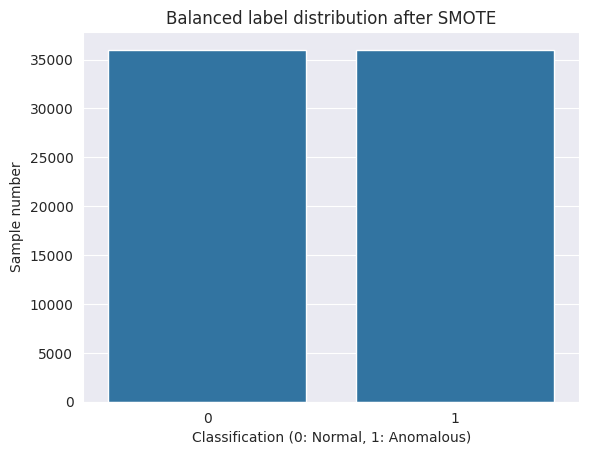

In [36]:
# Balanced Data visualization
sns.countplot(x=y_resampled)
plt.title('Balanced label distribution after SMOTE')
plt.xlabel('Classification (0: Normal, 1: Anomalous)')
plt.ylabel('Sample number')
plt.show()

## 2.5. Split training data
**Goal**: Split into train (70%), val (10%), test (20%) for training and evaluation

In [37]:
# Train:Val:Test theo tỷ lệ 7:2:1
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

# Save training data
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

Train: (50400, 2008) Val: (7128, 2008) Test: (14472, 2008)


# 3. MODEL TRAINING
## 3.1. Preparing data and shared functions

In [38]:
# Load saved training data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

# Check data size
print("Size of train set:", X_train.shape, y_train.shape)
print("Size of val set:", X_val.shape, y_val.shape)
print("Size of test set:", X_test.shape, y_test.shape)

Size of train set: (50400, 2008) (50400,)
Size of val set: (7128, 2008) (7128,)
Size of test set: (14472, 2008) (14472,)


#Random Forest Model

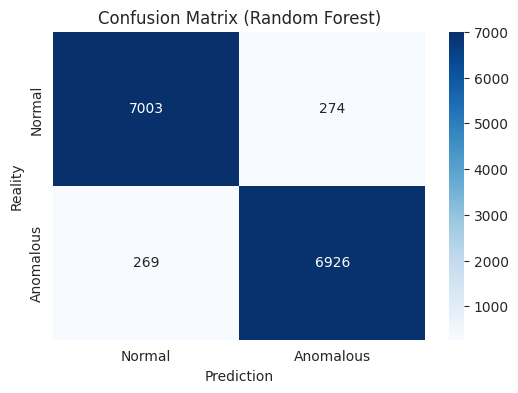

Classification Report (Random Forest):
              precision    recall  f1-score   support

      Normal       0.96      0.96      0.96      7277
   Anomalous       0.96      0.96      0.96      7195

    accuracy                           0.96     14472
   macro avg       0.96      0.96      0.96     14472
weighted avg       0.96      0.96      0.96     14472

Model saved as 'random_forest_model.pkl'


In [39]:

from sklearn.metrics import  classification_report


# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on test set
y_test_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.show()

# Classification Report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_test_pred, target_names=['Normal', 'Anomalous']))
# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")


#Naive Bayes

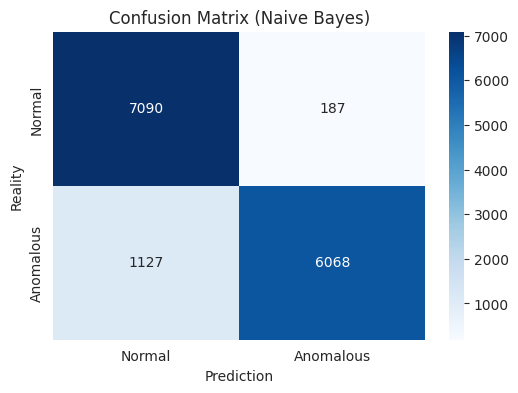

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

      Normal       0.86      0.97      0.92      7277
   Anomalous       0.97      0.84      0.90      7195

    accuracy                           0.91     14472
   macro avg       0.92      0.91      0.91     14472
weighted avg       0.92      0.91      0.91     14472

Model saved as 'naive_bayes_model.pkl'


In [40]:
# Initialize and train Naive Bayes model
nb_model = GaussianNB()  # You can change to another Naive Bayes model if needed
nb_model.fit(X_train, y_train)

# Predict on test set
y_test_pred = nb_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.show()

# Classification Report
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_test_pred, target_names=['Normal', 'Anomalous']))

# Save the trained model
joblib.dump(nb_model, 'naive_bayes_model.pkl')
print("Model saved as 'naive_bayes_model.pkl'")

#DecisionTreeClassifier

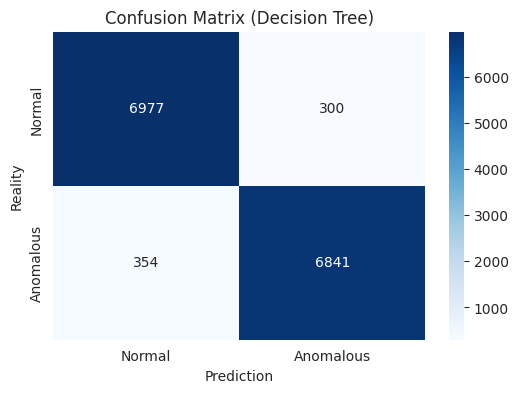

Classification Report (Decision Tree):
              precision    recall  f1-score   support

      Normal       0.95      0.96      0.96      7277
   Anomalous       0.96      0.95      0.95      7195

    accuracy                           0.95     14472
   macro avg       0.95      0.95      0.95     14472
weighted avg       0.95      0.95      0.95     14472

Model saved as 'decision_tree_model.pkl'


In [41]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # Initialize the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict on test set
y_test_pred = dt_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.show()

# Classification Report
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_test_pred, target_names=['Normal', 'Anomalous']))

# Save the trained model
joblib.dump(dt_model, 'decision_tree_model.pkl')
print("Model saved as 'decision_tree_model.pkl'")

#KNeighborsClassifier

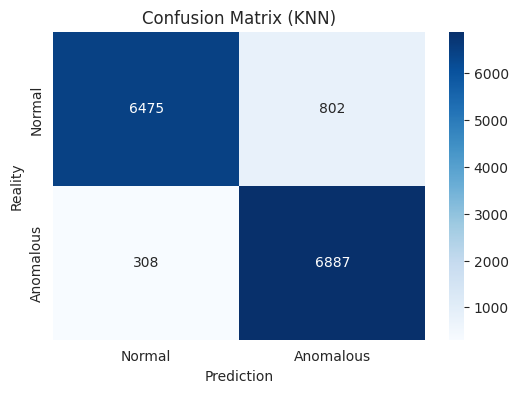

Classification Report (KNN):
              precision    recall  f1-score   support

      Normal       0.95      0.89      0.92      7277
   Anomalous       0.90      0.96      0.93      7195

    accuracy                           0.92     14472
   macro avg       0.93      0.92      0.92     14472
weighted avg       0.93      0.92      0.92     14472

Model saved as 'knn_model.pkl'


In [42]:
# Initialize and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with 5 neighbors
knn_model.fit(X_train, y_train)

# Predict on test set
y_test_pred = knn_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.show()

# Classification Report
print("Classification Report (KNN):")
print(classification_report(y_test, y_test_pred, target_names=['Normal', 'Anomalous']))

# Save the trained model
joblib.dump(knn_model, 'knn_model.pkl')
print("Model saved as 'knn_model.pkl'")

#XGBClassifier





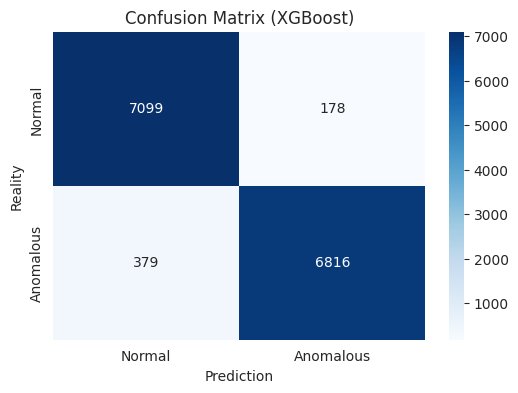

Classification Report (XGBoost):
              precision    recall  f1-score   support

      Normal       0.95      0.98      0.96      7277
   Anomalous       0.97      0.95      0.96      7195

    accuracy                           0.96     14472
   macro avg       0.96      0.96      0.96     14472
weighted avg       0.96      0.96      0.96     14472

Model saved as 'xgb_model.pkl'


In [43]:
# Initialize and train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # Initialize XGBoost model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_test_pred = xgb_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.show()

# Classification Report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_test_pred, target_names=['Normal', 'Anomalous']))

# Save the trained model
joblib.dump(xgb_model, 'xgb_model.pkl')
print("Model saved as 'xgb_model.pkl'")

#LSTM model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8294 - loss: 0.3463 - val_accuracy: 0.9400 - val_loss: 0.1397
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9650 - loss: 0.1081 - val_accuracy: 0.9554 - val_loss: 0.1131
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9830 - loss: 0.0612 - val_accuracy: 0.9574 - val_loss: 0.1171
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9853 - loss: 0.0510 - val_accuracy: 0.9595 - val_loss: 0.1235
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9869 - loss: 0.0458 - val_accuracy: 0.9598 - val_loss: 0.1312
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9873 - loss: 0.0445 - val_accuracy: 0.9603 - val_loss: 0.1320
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9885 - loss: 0.0425 - val_accuracy: 0.9601 - val_loss: 0.1379
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9888 - loss: 0.0411 - val_

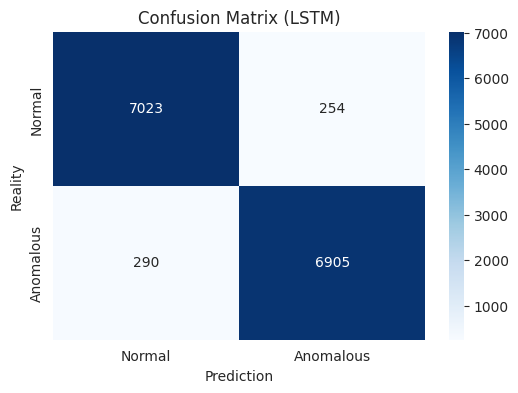

Classification Report (LSTM):
              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96      7277
   Anomalous       0.96      0.96      0.96      7195

    accuracy                           0.96     14472
   macro avg       0.96      0.96      0.96     14472
weighted avg       0.96      0.96      0.96     14472

LSTM model saved as 'lstm_model.h5'


In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape TF-IDF features to fit LSTM: (samples, timesteps=1, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Ensure y labels are in correct format (0/1)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build LSTM Model
model = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1]), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Predict
y_pred_prob = model.predict(X_test_lstm)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.title('Confusion Matrix (LSTM)')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.show()

# Classification Report
print("Classification Report (LSTM):")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anomalous']))

# Save model
model.save("lstm_model.h5")
print("LSTM model saved as 'lstm_model.h5'")


#DNN_Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8379 - loss: 0.3568 - val_accuracy: 0.9414 - val_loss: 0.1353
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9562 - loss: 0.1155 - val_accuracy: 0.9520 - val_loss: 0.1156
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9717 - loss: 0.0834 - val_accuracy: 0.9571 - val_loss: 0.1119
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9792 - loss: 0.0675 - val_accuracy: 0.9572 - val_loss: 0.1312
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9823 - loss: 0.0572 - val_accuracy: 0.9605 - val_loss: 0.1331
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9845 - loss: 0.0524 - val_accuracy: 0.9573 - val_loss: 0.1506
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9852 - loss: 0.0488 - val_accuracy: 0.9570 - val_loss: 0.1768
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9862 - loss: 0.0464 - 

Model 1 - DNN Classification Report:
               precision    recall  f1-score   support

      Normal       0.96      0.97      0.96      7277
   Anomalous       0.97      0.96      0.96      7195

    accuracy                           0.96     14472
   macro avg       0.96      0.96      0.96     14472
weighted avg       0.96      0.96      0.96     14472

CNN model saved as 'Dnn_model.h5'


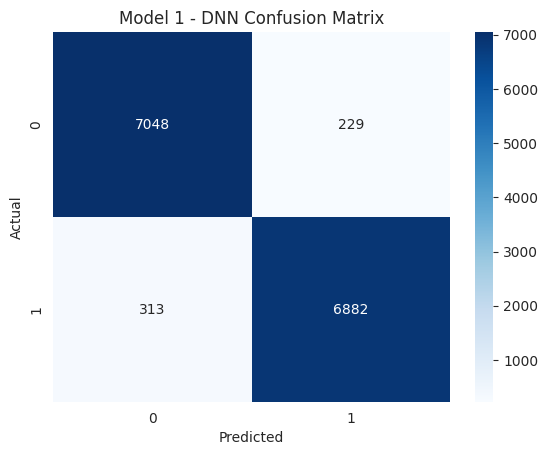

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


# Model 1: DNN
model1 = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Evaluation
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")
cm1 = confusion_matrix(y_test, y_pred1)
print("Model 1 - DNN Classification Report:\n", classification_report(y_test, y_pred1, target_names=['Normal', 'Anomalous']))

model1.save('Dnn_model.h5')
print("CNN model saved as 'Dnn_model.h5'")

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Model 1 - DNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#1D CNN_Model

Epoch 1/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 189s 582ms/step - accuracy: 0.8568 - loss: 0.3094 - val_accuracy: 0.9277 - val_loss: 0.1608
Epoch 2/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 179s 514ms/step - accuracy: 0.9470 - loss: 0.1315 - val_accuracy: 0.9442 - val_loss: 0.1501
Epoch 3/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 162s 514ms/step - accuracy: 0.9691 - loss: 0.0925 - val_accuracy: 0.9490 - val_loss: 0.1442
Epoch 4/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 160s 509ms/step - accuracy: 0.9797 - loss: 0.0643 - val_accuracy: 0.9535 - val_loss: 0.1571
Epoch 5/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 200s 502ms/step - accuracy: 0.9834 - loss: 0.0568 - val_accuracy: 0.9570 - val_loss: 0.1562
453/453 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step



Model 2 - CNN Classification Report:
               precision    recall  f1-score   support

      Normal       0.96      0.96      0.96      7277
   Anomalous       0.96      0.96      0.96      7195

    accuracy                           0.96     14472
   macro avg       0.96      0.96      0.96     14472
weighted avg       0.96      0.96      0.96     14472

✅ CNN model saved as 'cnn_model.h5'


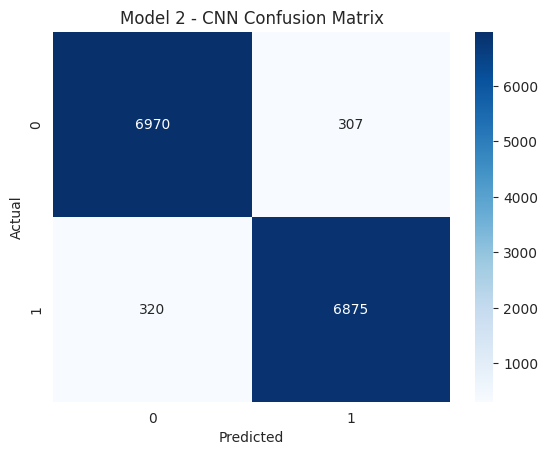

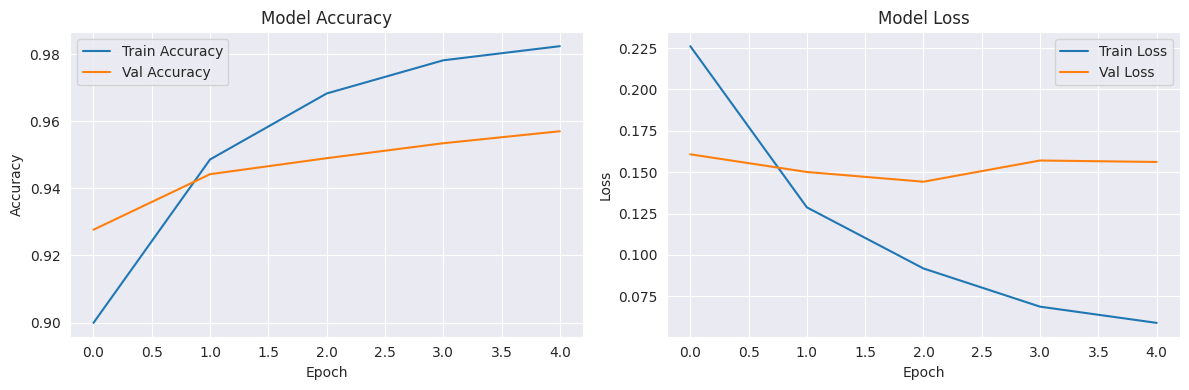

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Ensure input data is float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Reshape input data to (samples, steps, features) for 1D CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define CNN model
model2 = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model2.fit(X_train_cnn, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Predict on test set
y_pred2 = (model2.predict(X_test_cnn) > 0.5).astype("int32")

# Classification report and confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("\nModel 2 - CNN Classification Report:\n", classification_report(y_test, y_pred2, target_names=['Normal', 'Anomalous']))

# Save model
model2.save('cnn_model_N.h5')
print("✅ CNN model saved as 'cnn_model.h5'")

# Plot confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Model 2 - CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optional: Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 177s 555ms/step - accuracy: 0.8666 - loss: 0.3035 - val_accuracy: 0.9265 - val_loss: 0.1659
Epoch 2/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 194s 529ms/step - accuracy: 0.9491 - loss: 0.1299 - val_accuracy: 0.9443 - val_loss: 0.1446
Epoch 3/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 202s 530ms/step - accuracy: 0.9685 - loss: 0.0936 - val_accuracy: 0.9482 - val_loss: 0.1431
Epoch 4/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 202s 531ms/step - accuracy: 0.9769 - loss: 0.0743 - val_accuracy: 0.9500 - val_loss: 0.1516
Epoch 5/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 195s 511ms/step - accuracy: 0.9829 - loss: 0.0607 - val_accuracy: 0.9554 - val_loss: 0.1563
453/453 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step


Model 2 - CNN Classification Report:
               precision    recall  f1-score   support

      Normal       0.96      0.96      0.96      7277
   Anomalous       0.96      0.95      0.96      7195

    accuracy                           0.96     14472
   macro avg       0.96      0.96      0.96     14472
weighted avg       0.96      0.96      0.96     14472

CNN model saved as 'cnn_model.h5'


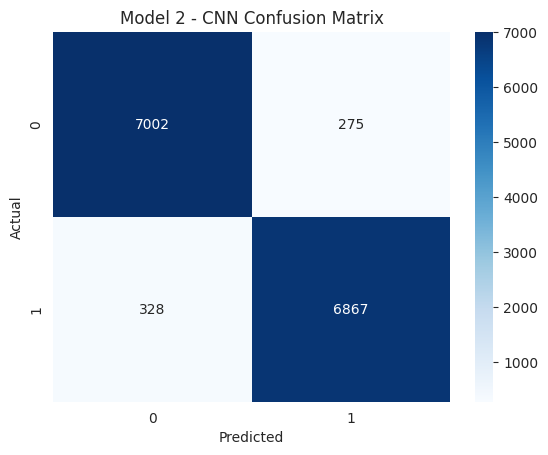

In [48]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Reshape

# Reshape for 1D CNN (samples, steps, features)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Model 2: CNN
model2 = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train_cnn, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Evaluation
y_pred2 = (model2.predict(X_test_cnn) > 0.5).astype("int32")
cm2 = confusion_matrix(y_test, y_pred2)
print("Model 2 - CNN Classification Report:\n", classification_report(y_test, y_pred2, target_names=['Normal', 'Anomalous']))

model2.save('cnn_model.h5')
print("CNN model saved as 'cnn_model.h5'")

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Model 2 - CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#COMPARASION

453/453 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
453/453 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
🏆 Best Model: DNN with Accuracy = 0.9625


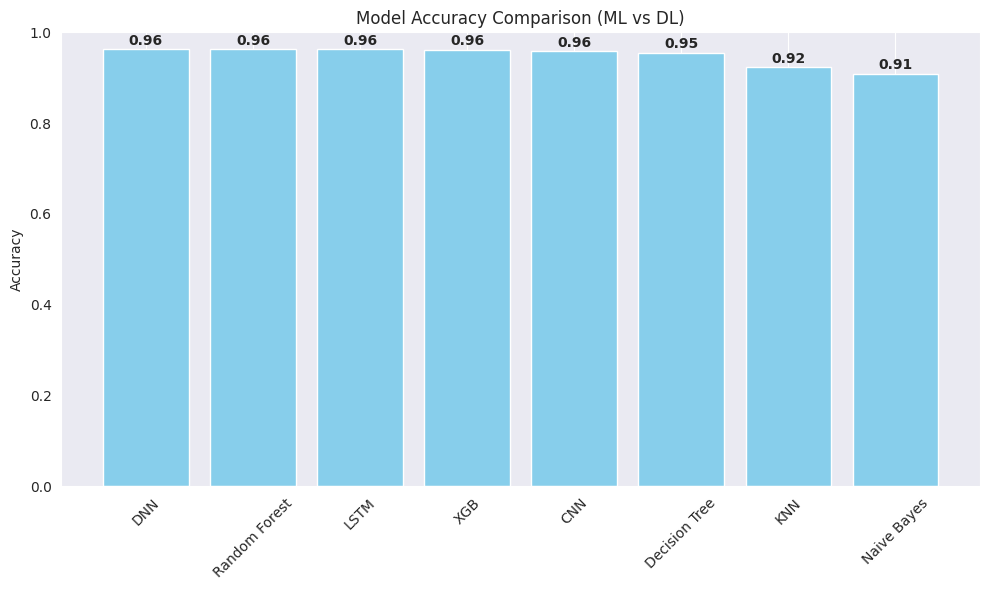

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load traditional ML models
ml_models = {
    'Decision Tree': joblib.load('decision_tree_model.pkl'),
    'Random Forest': joblib.load('random_forest_model.pkl'),
    'Naive Bayes': joblib.load('naive_bayes_model.pkl'),
    'KNN': joblib.load('knn_model.pkl'),
    'XGB': joblib.load('xgb_model.pkl'),
}

# Load deep learning models
dnn_model = load_model('Dnn_model.h5')
cnn_model = load_model('cnn_model.h5')
lstm_model = load_model('lstm_model.h5')

# Evaluate models
results = []

# Machine Learning Models
for name, model in ml_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})

# Deep Learning Models
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")
results.append({'Model': 'DNN', 'Accuracy': accuracy_score(y_test, y_pred_dnn)})

y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")
results.append({'Model': 'CNN', 'Accuracy': accuracy_score(y_test, y_pred_cnn)})

y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")
results.append({'Model': 'LSTM', 'Accuracy': accuracy_score(y_test, y_pred_lstm)})

# Create DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Print best model
best_model = results_df.iloc[0]
print(f"🏆 Best Model: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(10,6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison (ML vs DL)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
for i, acc in enumerate(results_df['Accuracy']):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

#fine_tuned_csic_Model

#REAL

In [ ]:

import os
os.environ["KERAS_BACKEND"] = "tensorflow"

from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GRU
from sentence_transformers import SentenceTransformer
from huggingface_hub import hf_hub_download

# Fix GRU time_major issue
class CustomGRU(GRU):
    def __init__(self, *args, **kwargs):
        kwargs.pop("time_major", None)  # Safely remove unsupported kwarg
        super().__init__(*args, **kwargs)

# Load model from HuggingFace
def load_modeler():
    local_model_path = hf_hub_download(
        repo_id="noobpk/web-attack-detection",
        filename="model.h5"
    )
    return load_model(local_model_path, custom_objects={"GRU": CustomGRU})

model = load_modeler()

# Load encoder
def load_encoder():
    model_name_or_path = os.environ.get("model_name_or_path", "sentence-transformers/all-MiniLM-L6-v2")
    return SentenceTransformer(model_name_or_path)

encoder = load_encoder()

# Main input loop
if __name__ == "__main__":
    payload = input("Enter payload: ")
    print("Processing...")

    embeddings = encoder.encode(payload).reshape((1, 384))
    prediction = model.predict(embeddings)
    accuracy = float(prediction[0][0] * 100)
    print(f"Accuracy: {accuracy:.2f}%")



In [ ]:
model.summary()

#NEW

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam
from sentence_transformers import SentenceTransformer
from huggingface_hub import hf_hub_download

# Handle GRU issue
class CustomGRU(GRU):
    def __init__(self, *args, **kwargs):
        kwargs.pop("time_major", None)
        super().__init__(*args, **kwargs)

# Load model from HuggingFace
def load_modeler():
    local_model_path = hf_hub_download(
        repo_id="noobpk/web-attack-detection",
        filename="model.h5"
    )
    return load_model(local_model_path, custom_objects={"GRU": CustomGRU})

# Load sentence encoder
def load_encoder():
    model_name_or_path = "sentence-transformers/all-MiniLM-L6-v2"
    return SentenceTransformer(model_name_or_path)

# Load and process dataset
def load_data(csv_path):
    df = pd.read_csv(csv_path)

    # Combine all features into one string per sample (excluding the label)
    feature_cols = [col for col in df.columns if col != 'classification']
    df['combined'] = df[feature_cols].astype(str).agg(' '.join, axis=1)

    texts = df['combined'].tolist()
    labels = df['classification'].astype(int).tolist()

    return texts, labels

# Fine-tune the model
def fine_tune(model, encoder, texts, labels, epochs=5, batch_size=32):
    print("Encoding payloads...")
    embeddings = encoder.encode(texts, convert_to_numpy=True)
    embeddings = embeddings.reshape((len(texts), 384, 1))

    labels = np.array(labels)

    X_train, X_val, y_train, y_val = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    print("Starting fine-tuning...")
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

    print("Training done. Saving model...")
    model.save("fine_tuned_csic_model.h5")
    print("Model saved as fine_tuned_csic_model.h5")

    # Predict on validation set
    y_pred_probs = model.predict(X_val)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Print classification report
    print("Classification Report:\n", classification_report(y_val, y_pred, target_names=['Normal', 'Anomalous']))

    # Compute confusion matrix
    cm = confusion_matrix(y_val, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
    plt.title("Fine-Tuned CSIC Model Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

if __name__ == "__main__":
    model = load_modeler()
    encoder = load_encoder()


    texts, labels = load_data("/content/csic_database.csv")  # <-- Make sure this file exists
    fine_tune(model, encoder, texts, labels, epochs=3)


#1D_CNN_Model_in_cleaned_requests.**jason**

In [52]:
import joblib
import numpy as np
import re
import json
from tensorflow.keras.models import load_model
from urllib.parse import parse_qs

# ---------------- Load Everything Needed ----------------
cnn_model = load_model('cnn_model.h5')
scaler = joblib.load('scaler.pkl')

with open('url_vectorizer.pkl', 'rb') as f:
    url_tfidf = joblib.load(f)

with open('content_vectorizer.pkl', 'rb') as f:
    content_tfidf = joblib.load(f)

# ---------------- Feature Extraction Function ----------------
def extract_features_for_entry(uri, method, payload_dict):
    malicious_keywords = [
        'SELECT', 'UNION', 'DROP', 'DELETE', 'FROM', 'WHERE', 'OR', 'LIKE', 'AND', '1=1', '--', '\'',
        'SCRIPT', 'javascript', 'alert', 'iframe', 'src=', 'onerror', 'prompt', 'confirm', 'eval', 'onload',
        'mouseover', 'onunload', 'document.', 'window.', 'xmlhttprequest', 'xhr', 'cookie',
        'tamper', 'vaciar', 'carrito', 'incorrect', 'pwd', 'login', 'password', 'id',
        '%0D', '%0A', '.php', '.js', 'admin', 'administrator'
    ]

    uri = uri.replace('http://localhost:8080', '')

    content = '&'.join([f"{k}={v}" for k, v in payload_dict.items()]) if payload_dict else ""

    manual = [
        len(uri),
        len(re.findall(r'[%;=<>\/&\'"()\[\]#\-\+]', uri)),
        sum(1 for kw in malicious_keywords if kw.lower() in uri.lower()),
        uri.count('&') + 1 if '?' in uri else 0,
        len(content),
        len(re.findall(r'[%;=<>\/&\'"()\[\]#\-\+]', content)),
        sum(1 for kw in malicious_keywords if kw.lower() in content.lower()),
        1 if method == 'POST' else 0
    ]

    url_vec = url_tfidf.transform([uri]).toarray()
    content_vec = content_tfidf.transform([content]).toarray()

    full_feature = np.hstack([manual, url_vec[0], content_vec[0]])



    return full_feature.reshape(1, -1)

# ---------------- Main Execution ----------------
with open('/content/cleaned_requests.json', 'r') as f:
    data_entries = json.load(f)

for idx, entry in enumerate(data_entries):
    try:
        if entry.get('type') != 'request':
            continue

        uri = entry.get('url', '') or entry.get('referrer', '') or entry.get('uri', '')
        method = entry.get('method', 'GET')

        content_raw = entry.get('content', {})
        if isinstance(content_raw, str):
            try:
                content = json.loads(content_raw)
            except:
                content = {}
        else:
            content = content_raw

        payload = content.get('payload', {})
        if isinstance(payload, str):
            payload = {k: v[0] if len(v) == 1 else v for k, v in parse_qs(payload).items()}

        x_entry = extract_features_for_entry(uri, method, payload)
        x_entry_scaled = scaler.transform(x_entry)

        # Reshape for CNN: (batch_size, features, 1)
        x_entry_reshaped = x_entry_scaled.reshape((x_entry_scaled.shape[0], x_entry_scaled.shape[1], 1))

        prediction = cnn_model.predict(x_entry_reshaped)
        prediction_class = int(prediction[0][0] > 0.5)  # Binary classification threshold

        print(f"[{idx}] URL: {uri} | Prediction: {prediction_class} {'🚨 Anomalous' if prediction_class == 1 else '✅ Normal'}")

    except Exception as e:
        print(f"[{idx}] Error processing entry: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[0] URL: http://127.0.0.1:8000/ | Prediction: 0 ✅ Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[1] URL: http://127.0.0.1:8000/products | Prediction: 0 ✅ Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[2] URL: http://127.0.0.1:8000/ | Prediction: 0 ✅ Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[3] URL: http://127.0.0.1:8000/ | Prediction: 0 ✅ Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[4] URL: http://127.0.0.1:8000/user=ali | Prediction: 0 ✅ Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[5] URL: http://127.0.0.1:8000/ | Prediction: 0 ✅ Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[6] URL: http://127.0.0.1:8000/products | Prediction: 0 ✅ Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[7] URL: http://127.0.0.1:8000/sales | Prediction: 0 ✅ Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[8] URL: http://127.0.0.1:8000/sales | Prediction: 0 ✅ Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[9] URL: http://127.0.0.1:8000/sales | Prediction: 0 ✅ Normal
1/1 ━━━━━━